In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_csv('titanic.csv')

In [ ]:
titanic

In [ ]:
titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()

#Ao colocar o survived, vira uma Série, necessitando o unstack para voltar a ser um DataFrame com os valores mean

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class')

#Forma mais simples de realizar um group by complexo, através de pivot_table

In [ ]:
age = pd.cut(titanic['age'], [0,18,80])
age.value_counts()

#Cut divide os ranges sem ligar para uma divisão exata de valores

In [ ]:
titanic.pivot_table('survived',['sex',age],'class')

In [ ]:
fare = pd.qcut(titanic['fare'],2)
fare.value_counts()

#QCut divide em ranges com quantidades muito próximas

In [ ]:
titanic.pivot_table('survived',['sex',age], [fare,'class'])

In [ ]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare':'mean'})

In [ ]:
titanic.pivot_table('survived',index='sex', columns='class', margins=True)

#Margins calcula o total dos grupos

In [ ]:
births = pd.read_csv('births.csv')

In [ ]:
births.head()

In [ ]:
births['decade'] = 10*(births['year'] //10)

In [ ]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

In [ ]:

import matplotlib as plt

In [ ]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum')

In [ ]:
quartiles = np.percentile(births['births'],[20, 50, 75])

In [ ]:
mu = quartiles[1]

In [ ]:
sig = 0.74*(quartiles[2] - quartiles[0])

In [ ]:
quartiles

In [ ]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [ ]:
births['day'] = births['day'].astype(int)

In [ ]:
births.index = pd.to_datetime(10000 * births.year + 100*births.month + births.day, format='%Y%m%d')

In [ ]:
births['dayofweek'] = births.index.dayofweek

In [ ]:
births['dayofweek']

In [ ]:
import matplotlib as mpl

In [ ]:
births.pivot_table('births', index='dayofweek', columns='decade',aggfunc='mean')

In [ ]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data] #Transforma qualquer string em um formato legível padronizado (Xxxx)

In [ ]:
names = pd.Series(data)

In [ ]:
names.str.capitalize()

In [ ]:
names = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 'Eric Idle', 'Terry Jones','Michael Palin'])

In [ ]:
names.str.startswith('J')

In [ ]:
names.str.split()

In [ ]:
names.str.extract('([A-Za-z]+)')

In [ ]:
names.str.slice(0,3)

In [ ]:
names.str.get(-1)

In [ ]:
full_names = pd.DataFrame({'name':names, 'info':['B@C@D','B@D','A@C','B@D','B@C','B@C@D']})

In [ ]:
full_names

In [ ]:
full_names['info'].str.get_dummies('@')

#get_dummies permite que rapidamente apresentarmos em um DataFrame variáveis com um determinado caractere

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [1]:
from dateutil import parser

In [2]:
from datetime import datetime

In [3]:
import numpy as np

In [4]:
date = np.array('2015-07-04', dtype=np.datetime64)

In [5]:
date

array('2015-07-04', dtype='datetime64[D]')

In [6]:
np.arange(12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [7]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [8]:
np.datetime64('2015-07-04 12:59:59.500', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [9]:
np.datetime64('2015-07-04 12:59:59.500', 'Y')

numpy.datetime64('2015')

In [10]:
import pandas as pd

In [11]:
date = pd.to_datetime("4th of July, 2015")

In [12]:
date

Timestamp('2015-07-04 00:00:00')

In [16]:
date.strftime('%A')

'Saturday'

In [17]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [18]:
index = pd.DatetimeIndex(['2017-07-04', '2015-08-04', '2015-07-04','2015-08-04'])

In [19]:
data = pd.Series([0,1,2,3], index=index)
data

2017-07-04    0
2015-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [20]:
data['2014-07-04':'2015-07-04']

2015-07-04    2
dtype: int64

In [21]:
data['2017']

2017-07-04    0
dtype: int64

In [23]:
data.to_period('D')

2017-07-04    0
2015-08-04    1
2015-07-04    2
2015-08-04    3
Freq: D, dtype: int64

In [24]:
data - data[0]

2017-07-04    0
2015-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [25]:
pd.date_range('2015-07-03','2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [26]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [27]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [28]:
pd.date_range('2015-07-03', periods=8, freq='M')

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29'],
              dtype='datetime64[ns]', freq='M')

In [29]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [30]:
pd.timedelta_range(0, periods=9, freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [31]:
from pandas.tseries.offsets import BDay

In [32]:
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [1]:
import pandas as pd

In [2]:
import numpy as py

In [3]:
from pandas_datareader import data

In [8]:
import matplotlib.pyplot as plt

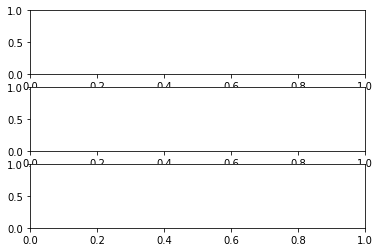

In [10]:
fig, ax = plt.subplots(3, sharey=True)
#shift() shifts the data and the tshift() shifts the index

In [13]:
data = pd.read_csv('Freemont.csv', index_col='Date', parse_dates=True)

In [14]:
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [15]:
data.columns = ['West','East']

In [20]:
data['Total'] = data.eval('West + East')
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [22]:
data.dropna().describe()

,West,East,Total
count,49600.000000,49600.000000,49600.000000
mean,54.716230,55.895887,110.612117
std,73.001037,81.137001,140.092804
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


In [25]:
%matplotlib inline
import seaborn as sns
sns.set()

Text(0,0.5,'Hour Bicycle Count')

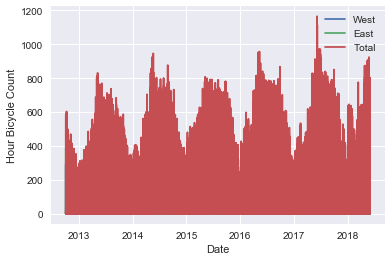

In [26]:
data.plot()
plt.ylabel('Hour Bicycle Count')

Text(0,0.5,'Weekly bicycle count')

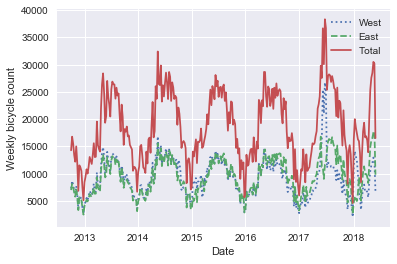

In [28]:
weekly = data.resample('W').sum()
weekly.plot(style=[':','--','-'])
plt.ylabel('Weekly bicycle count')

In [29]:
daily = data.resample('D').sum()

Text(0,0.5,'mean hourly count')

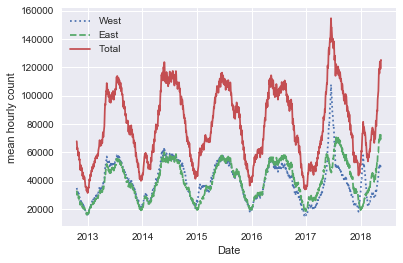

In [35]:
daily.rolling(30, center=True).sum().plot(style=[':','--','-'])
plt.ylabel('mean hourly count')

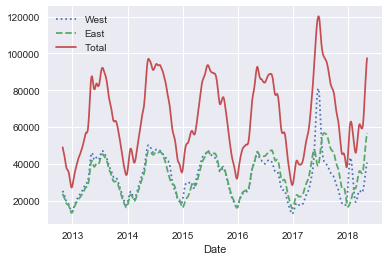

In [36]:
2

.:52550d445qaily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':','--','-'])

In [39]:
by_time = data.groupby(data.index.time).mean()
import numpy as np

In [40]:
hourly_ticks = 4 * 60 * 60 * np.arange(6)

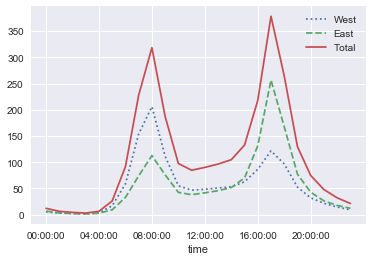

In [41]:
by_time.plot(xticks=hourly_ticks, style=[':','--','-'])

In [42]:
by_weekday = data.groupby(data.index.dayofweek).mean()

In [43]:
by_weekday.index = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']

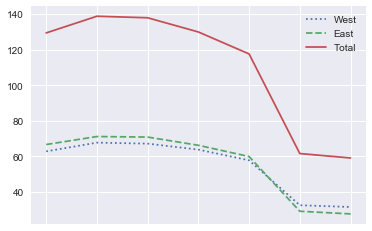

In [45]:
by_weekday.plot(style=[':','--','-']);

In [46]:
weekend = np.where(data.index.weekday < 5, 'Weekday','Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

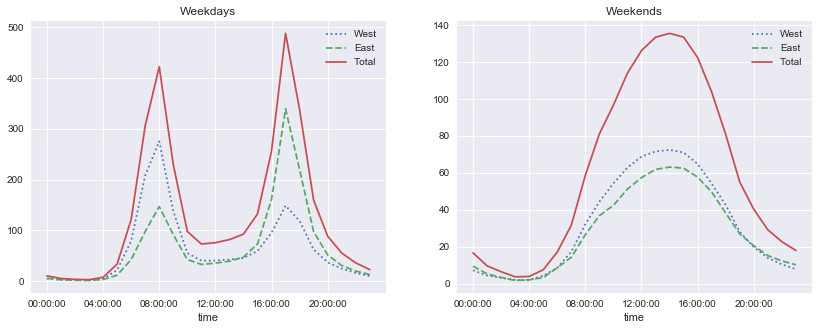

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':','--','-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':','--','-'])